# DATA INITIALIZING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load cleaned and combined data
filepath = "D:\\6980-Capstone\\Individual Project\\datasets\\syringe_requests_data.csv" 
df = pd.read_csv(filepath)

In [3]:
df.shape

(66163, 29)

In [4]:
df.head()

,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,reason,...,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source,year,geometry
0,101001382252,2015-05-21 05:31:02,2015-05-21 05:31:02,2015-05-21 05:32:53.000000000,ONTIME,Closed,Case Closed. Closed date : 2015-05-21 09:32:53...,Needle Pickup,Mayor's 24 Hour Hotline,Needle Program,...,3,03,0306,1 City Hall Plz,2203,42.360294,-71.058270,Constituent Call,2015,POINT (-71.05827049817206 42.36029444855839)
1,101001382293,2015-05-21 06:01:46,2015-05-21 06:01:46,2015-05-21 06:02:16.000000000,ONTIME,Closed,Case Closed. Closed date : 2015-05-21 10:02:16...,Needle Pickup,Mayor's 24 Hour Hotline,Needle Program,...,3,03,0306,1 City Hall Plz,2203,42.360294,-71.058270,Constituent Call,2015,POINT (-71.05827049817206 42.36029444855839)
2,101001383044,2015-05-22 05:24:00,2015-05-22 05:24:00,2015-05-24 13:25:57.000000000,ONTIME,Closed,Case Closed. Closed date : 2015-05-24 17:25:57...,Needle Pickup,Mayor's 24 Hour Hotline,Needle Program,...,5,Ward 7,0707,INTERSECTION Logan Way & Old Colony Ave,2127,42.327080,-71.052542,Constituent Call,2015,POINT (-71.05254193577905 42.32708024671045)
3,101001383310,2015-05-22 08:40:00,2015-05-22 08:40:00,2015-05-22 11:10:51.000000000,ONTIME,Closed,Case Closed. Closed date : 2015-05-22 15:10:51...,Needle Pickup,Mayor's 24 Hour Hotline,Needle Program,...,13,Ward 8,0806,INTERSECTION Massachusetts Ave & Proctor St,2118,42.327563,-71.067513,Constituent Call,2015,POINT (-71.0675131221476 42.32756290710646)
4,101001394204,2015-05-25 09:08:00,2015-05-25 09:08:00,2015-05-28 17:17:49.000000000,ONTIME,Closed,Case Closed. Closed date : 2015-05-28 21:17:49...,Needle Pickup,Mayor's 24 Hour Hotline,Needle Program,...,6,Ward 9,0902,INTERSECTION W Concord St & Shawmut Ave,2118,42.338729,-71.075918,Constituent Call,2015,POINT (-71.07591797628783 42.33872934565846)


### Checking the null values

In [7]:
check_null = df.isnull().sum()
nulpercent = check_null/len(df)*100
print(nulpercent)

case_enquiry_id                   0.0
open_dt                           0.0
sla_target_dt                     0.0
closed_dt                         0.0
on_time                           0.0
case_status                       0.0
closure_reason                    0.0
case_title                        0.0
subject                           0.0
reason                            0.0
type                              0.0
queue                             0.0
department                        0.0
location                          0.0
fire_district                     0.0
pwd_district                      0.0
city_council_district             0.0
police_district                   0.0
neighborhood                      0.0
neighborhood_services_district    0.0
ward                              0.0
precinct                          0.0
location_street_name              0.0
location_zipcode                  0.0
latitude                          0.0
longitude                         0.0
source      

In [10]:
#check blank values
check_blank = df.eq(' ').sum()
print(check_blank)

case_enquiry_id                     0
open_dt                             0
sla_target_dt                       0
closed_dt                           0
on_time                             0
case_status                         0
closure_reason                     62
case_title                          0
subject                             0
reason                              0
type                                0
queue                               0
department                          0
location                            0
fire_district                       5
pwd_district                        2
city_council_district               0
police_district                     2
neighborhood                        0
neighborhood_services_district      0
ward                                0
precinct                          278
location_street_name                0
location_zipcode                    0
latitude                            0
longitude                           0
source      

In [14]:
df = df.replace(' ', np.nan)
# Drop rows with NaN values
df = df.dropna()


In [16]:
#verify blank values
print(df.eq(' ').sum())

case_enquiry_id                   0
open_dt                           0
sla_target_dt                     0
closed_dt                         0
on_time                           0
case_status                       0
closure_reason                    0
case_title                        0
subject                           0
reason                            0
type                              0
queue                             0
department                        0
location                          0
fire_district                     0
pwd_district                      0
city_council_district             0
police_district                   0
neighborhood                      0
neighborhood_services_district    0
ward                              0
precinct                          0
location_street_name              0
location_zipcode                  0
latitude                          0
longitude                         0
source                            0
year                        

In [18]:
df.dtypes

case_enquiry_id                     int64
open_dt                            object
sla_target_dt                      object
closed_dt                          object
on_time                            object
case_status                        object
closure_reason                     object
case_title                         object
subject                            object
reason                             object
type                               object
queue                              object
department                         object
location                           object
fire_district                      object
pwd_district                       object
city_council_district               int64
police_district                    object
neighborhood                       object
neighborhood_services_district      int64
ward                               object
precinct                           object
location_street_name               object
location_zipcode                  

### Datatype conversion

In [21]:
# Convert datetime coln to datetime datatype
df['open_dt'] = pd.to_datetime(df['open_dt'])
df['sla_target_dt'] = pd.to_datetime(df['sla_target_dt'])
#_id is a unique identifier so can't be numerical
df['case_enquiry_id'] = df['case_enquiry_id'].astype('object')  
#handling the mixed format in closed date column
import pandas as pd

# Convert 'closed_dt' to datetime, handling mixed formats
df['closed_dt'] = pd.to_datetime(df['closed_dt'], errors='coerce', format='mixed')

# Check for rows with conversion errors (NaT values)
if df['closed_dt'].isnull().sum() > 0:
    print(f"Warning: {df['closed_dt'].isnull().sum()} rows could not be converted to datetime.")
    # Optionally, drop rows with NaT values
    df.dropna(subset=['closed_dt'], inplace=True)

#Convert columns with limited unique values to category
df['location_zipcode'] = df['location_zipcode'].astype('Int64').astype('category')  # Handle NaN & categorical nature
df['on_time'] = df['on_time'].astype('category')  # Only 2 possible values
df['year'] = df['year'].astype('category') 
df['fire_district'] = df['fire_district'].astype('category')  
df['pwd_district'] = df['pwd_district'].astype('category')
df['city_council_district'] = df['city_council_district'].astype('category')  
df['police_district'] = df['police_district'].astype('category')
df['neighborhood_services_district'] = df['neighborhood_services_district'].astype('category')

#verify datatypes
print(df.dtypes)

case_enquiry_id                           object
open_dt                           datetime64[ns]
sla_target_dt                     datetime64[ns]
closed_dt                         datetime64[ns]
on_time                                 category
case_status                               object
closure_reason                            object
case_title                                object
subject                                   object
reason                                    object
type                                      object
queue                                     object
department                                object
location                                  object
fire_district                           category
pwd_district                            category
city_council_district                   category
police_district                         category
neighborhood                              object
neighborhood_services_district          category
ward                

In [23]:
# Update the ward column to keep only the number
df['ward'] = df['ward'].str.extract('(\d+)').astype(int).astype(str)

# Verify the changes
print(df['ward'].head())

0    3
1    3
2    7
3    8
4    9
Name: ward, dtype: object


# SUMMARY STATISTICS

In [26]:
# Summary statistics for numerical data
numerical_summary = df.describe(include=["float64", "int64"])

# Summary statistics for categorical data
categorical_summary = df.describe(include=['category', 'object'])

# Display results
print("Numerical Summary Statistics:")
print(numerical_summary)

print("\nCategorical Summary Statistics:")
print(categorical_summary)


Numerical Summary Statistics:
           latitude     longitude
count  65820.000000  65820.000000
mean      42.335615    -71.073783
std        0.016378      0.016697
min       42.232100    -71.174341
25%       42.330280    -71.079717
50%       42.336520    -71.074501
75%       42.342890    -71.064771
max       42.395173    -70.996384

Categorical Summary Statistics:
        case_enquiry_id on_time case_status  \
count             65820   65820       65820   
unique            65820       2           2   
top        101001382252  ONTIME      Closed   
freq                  1   65815       65815   

                                           closure_reason     case_title  \
count                                               65820          65820   
unique                                              65817              2   
top     Case Closed Case Resolved  Dear Constituent   ...  Needle Pickup   
freq                                                    3          65815   

              

# VISUALIZATIONS

### 1. Request Density By Neighbourhood Services District

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count requests by neighborhood
neighborhood_counts = df['neighborhood_services_district'].value_counts()

# Convert to DataFrame for plotting
neighborhood_df = neighborhood_counts.reset_index()
neighborhood_df.columns = ['Neighborhood', 'Request Count']

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(neighborhood_df[['Request Count']].T, annot=True, fmt="d", cmap="YlOrRd", cbar=False)
plt.title('Request Density by Neighborhood')
plt.xlabel('Neighborhood Services District')
plt.ylabel('')
plt.xticks(ticks=range(len(neighborhood_df)), labels=neighborhood_df['Neighborhood'])
plt.show()


### 2. Trend in Syringe Requests over Time (2015 - 2025)

#### 2.1 YEARLY TRENDS

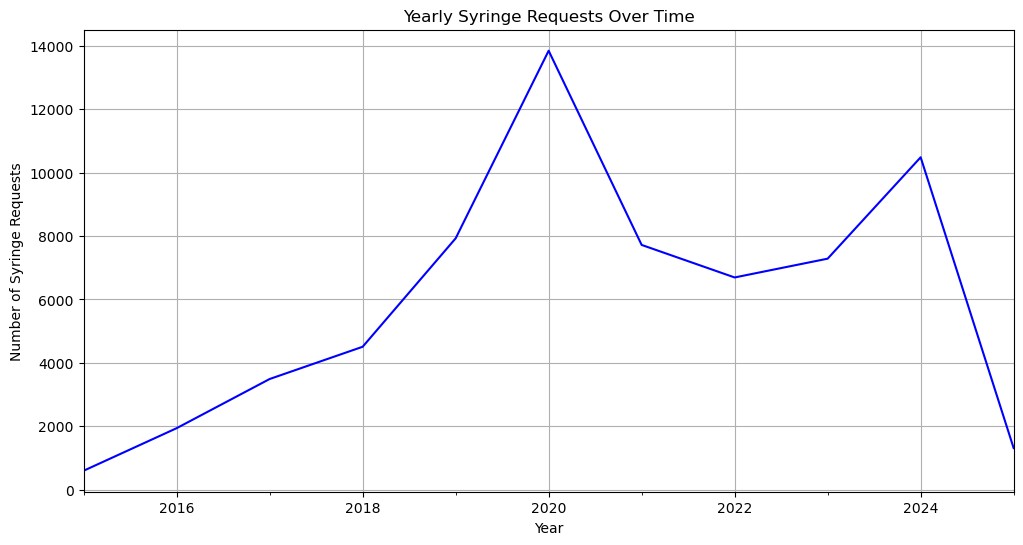

In [29]:
# Group by month and count requests
yearly_req = df.resample('Y', on='open_dt').size()

# Plot line chart
plt.figure(figsize=(12, 6))
yearly_req.plot(kind='line', color='blue')
plt.title('Yearly Syringe Requests Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Syringe Requests')
plt.grid(True)
plt.show()


#### MONTHLY TRENDS

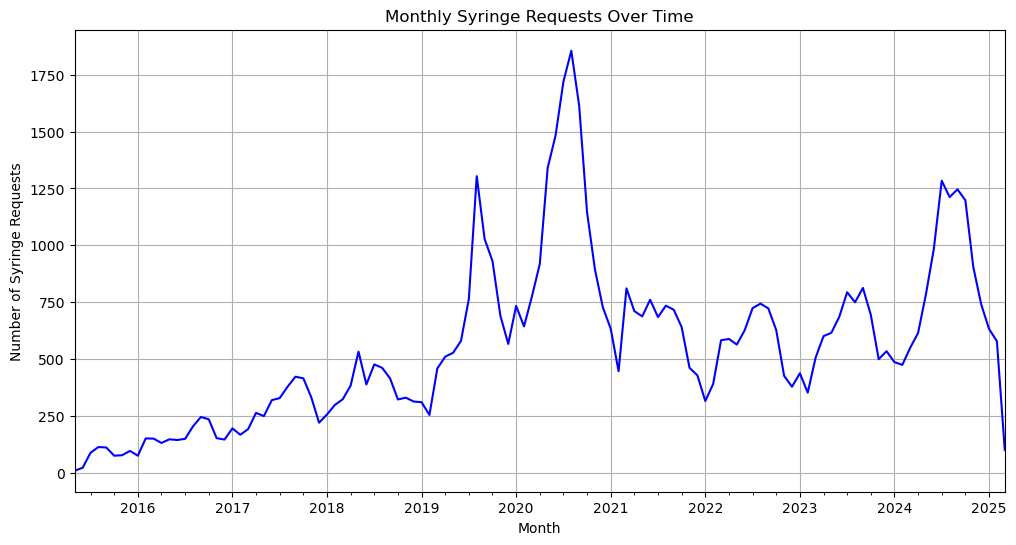

In [32]:
# Group by month and count requests
monthly_requests = df.resample('M', on='open_dt').size()

# Plot line chart
plt.figure(figsize=(12, 6))
monthly_requests.plot(kind='line', color='blue')
plt.title('Monthly Syringe Requests Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Syringe Requests')
plt.grid(True)
plt.show()


#### WEEKLY TRENDS

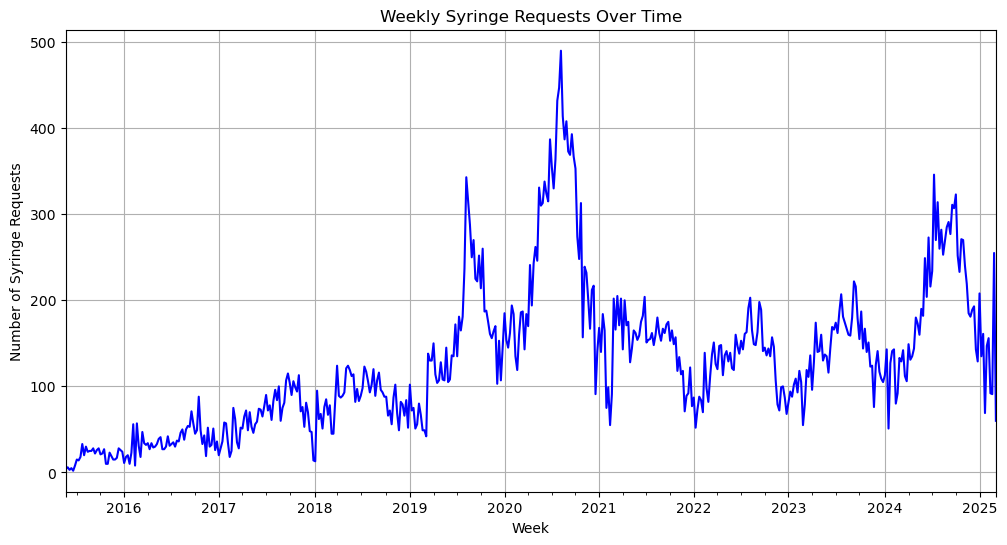

In [35]:
# Group by month and count requests
weekly_req = df.resample('W', on='open_dt').size()

# Plot line chart
plt.figure(figsize=(12, 6))
weekly_req.plot(kind='line', color='blue')
plt.title('Weekly Syringe Requests Over Time')
plt.xlabel('Week')
plt.ylabel('Number of Syringe Requests')
plt.grid(True)
plt.show()


#### DAILY TRENDS

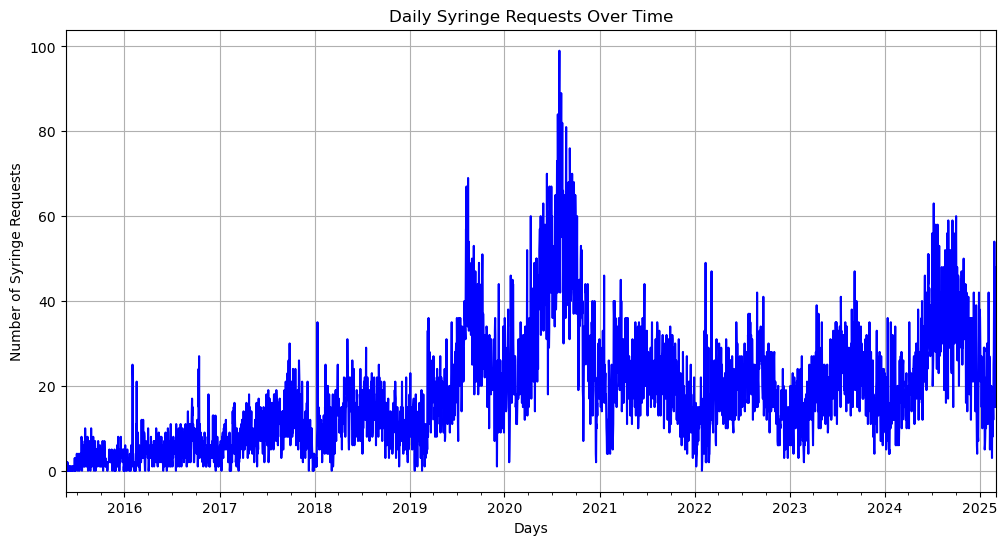

In [38]:
# Group by month and count requests
daily_req = df.resample('D', on='open_dt').size()

# Plot line chart
plt.figure(figsize=(12, 6))
daily_req.plot(kind='line', color='blue')
plt.title('Daily Syringe Requests Over Time')
plt.xlabel('Days')
plt.ylabel('Number of Syringe Requests')
plt.grid(True)
plt.show()


### 3. Distribution of Case Status by Year

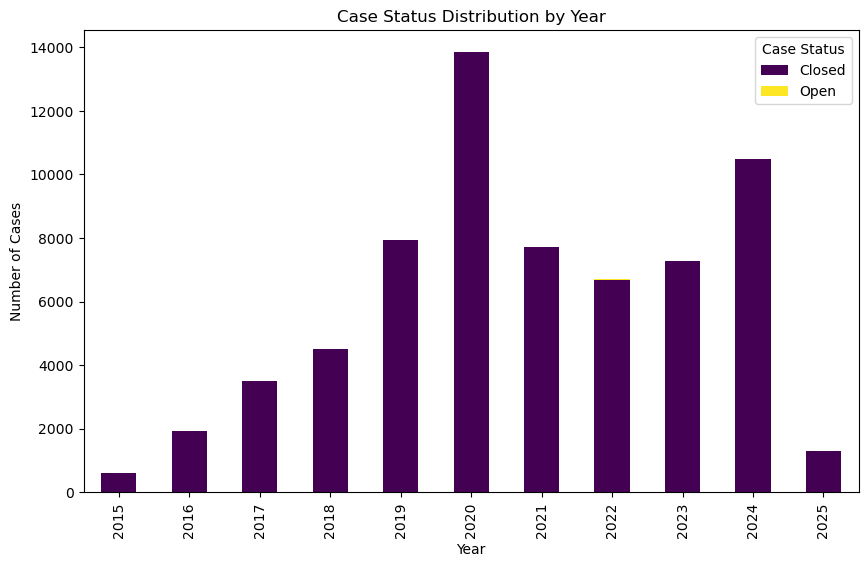

In [41]:
# Group data by year and case_status
status_by_year = df.groupby(['year', 'case_status']).size().unstack()

# Plot stacked bar chart
status_by_year.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Case Status Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend(title='Case Status')
plt.show()


### 4. Distribution of Syringe requests in neighborhood

In [44]:
# Group data by neighborhood and count syringe-related requests
neighborhood_summary = df.groupby('neighborhood').size().reset_index(name='request_count')

# Sort neighborhoods by request count
neighborhood_summary = neighborhood_summary.sort_values(by='request_count', ascending=False)

# Display top neighborhoods
print(neighborhood_summary.head())


                              neighborhood  request_count
18                                 Roxbury          16842
21                               South End          15511
20  South Boston / South Boston Waterfront           6996
8                               Dorchester           6087
2                                 Back Bay           4556


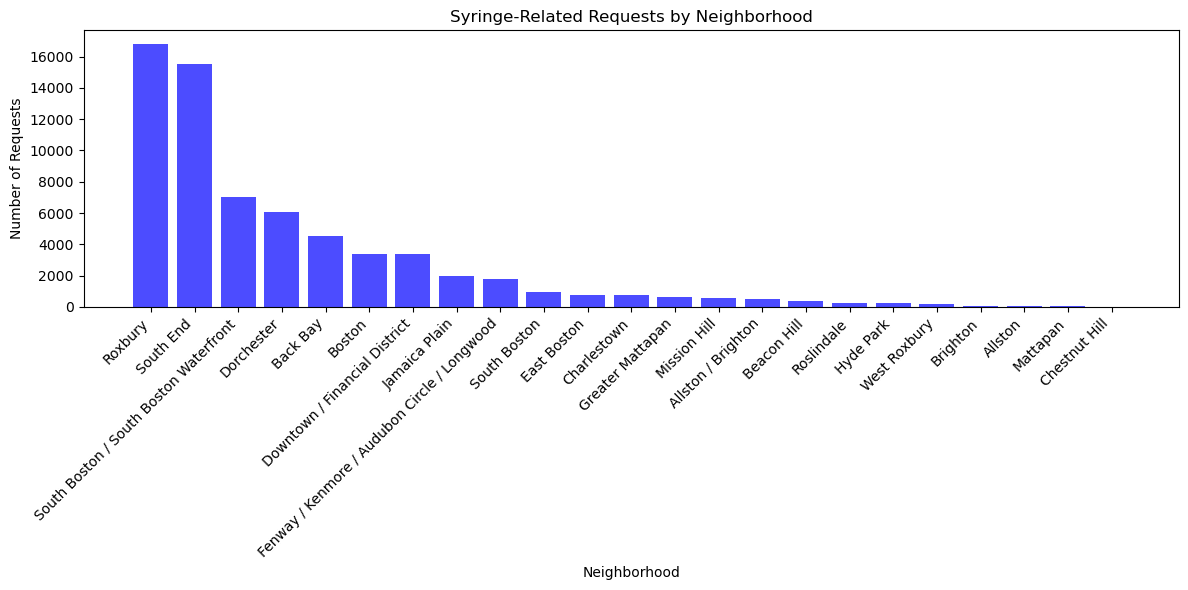

In [46]:
# Plot bar chart of syringe-related requests by neighborhood
plt.figure(figsize=(12, 6))
plt.bar(neighborhood_summary['neighborhood'], neighborhood_summary['request_count'], color='blue', alpha=0.7)
plt.title('Syringe-Related Requests by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# GEOSPATIONAL ANALYSIS

#### Geospatial representation of Ontime vs Overdue Syringe Requests

In [49]:
!pip install geopandas

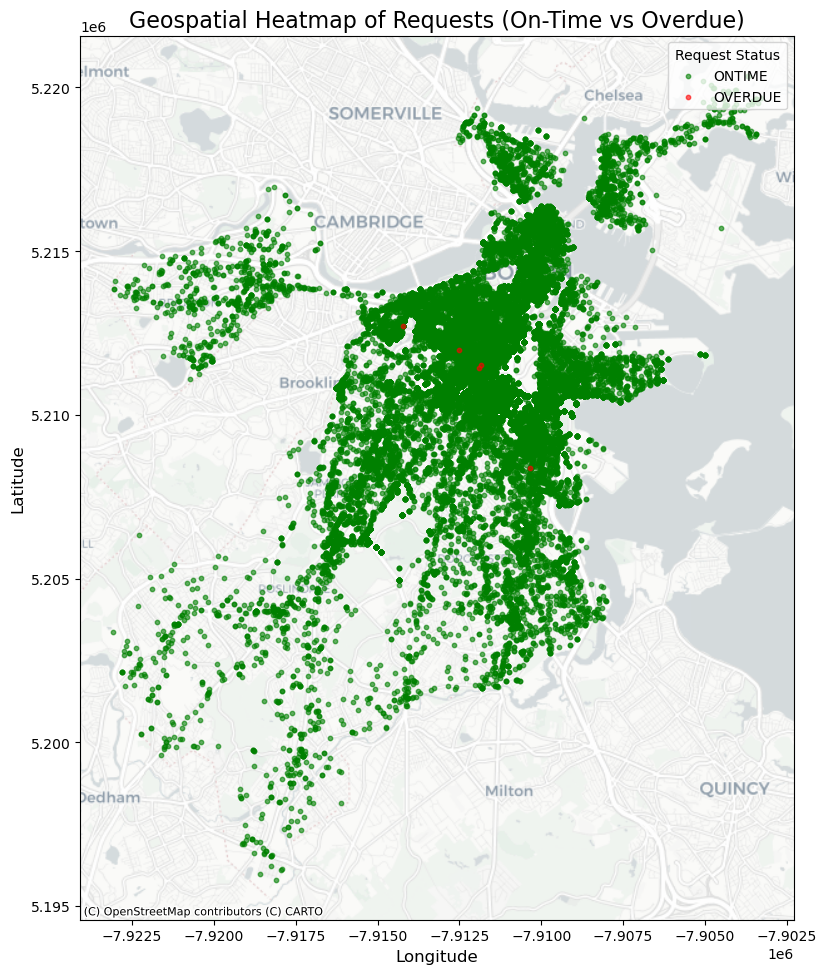

In [50]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx  # For adding basemaps

# Convert DataFrame to GeoDataFrame if not already done
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326"
)

# Convert CRS to Web Mercator (EPSG:3857) for compatibility with basemaps
gdf = gdf.to_crs(epsg=3857)

# Create a custom color mapping for 'on_time' column
color_map = {'ONTIME': 'green', 'OVERDUE': 'red'}

# Plot the points with custom colors
fig, ax = plt.subplots(figsize=(12, 10))
for status, data in gdf.groupby('on_time'):
    data.plot(ax=ax, color=color_map[status], label=status, alpha=0.6, markersize=10)

# Add basemap using contextily
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

# Customize plot appearance
ax.set_title('Geospatial Heatmap of Requests (On-Time vs Overdue)', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.legend(title='Request Status', loc='upper right')
plt.tight_layout()

plt.show()


# DATA FORECASTING 
### CSRP Program impact on Syringe Requests
#### The Community Syringe Redemption Program was introduced on December 14, 2020 with an aim that reduces the amount of unsafely discarded needles by offering a cash incentive for enrolled adults to return syringes. 
#### LINK - CSRP — Addiction Response Resources. Addiction Response Resources. https://www.addictionresponse.com/csrp 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=13272.654, Time=2.93 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=14185.726, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=13819.934, Time=0.43 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=13421.097, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=14183.734, Time=0.07 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=13363.498, Time=1.79 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=13360.936, Time=1.71 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=13266.136, Time=10.39 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=13327.115, Time=5.69 sec
 ARIMA(2,1,2)(2,0,2)[7] intercept   : AIC=13268.142, Time=12.46 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=13264.622, Time=11.67 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=13336.702, Time=5.72 sec
 ARIMA(1,1,2)(1,0,2)[7] intercept   : AIC=13260.727, Time=10.27 sec
 ARIMA(1,1,2)(0,0,2)[7] intercept   : AIC=13335.881, Time=4.22 sec
 ARIMA(1,1,2)(1

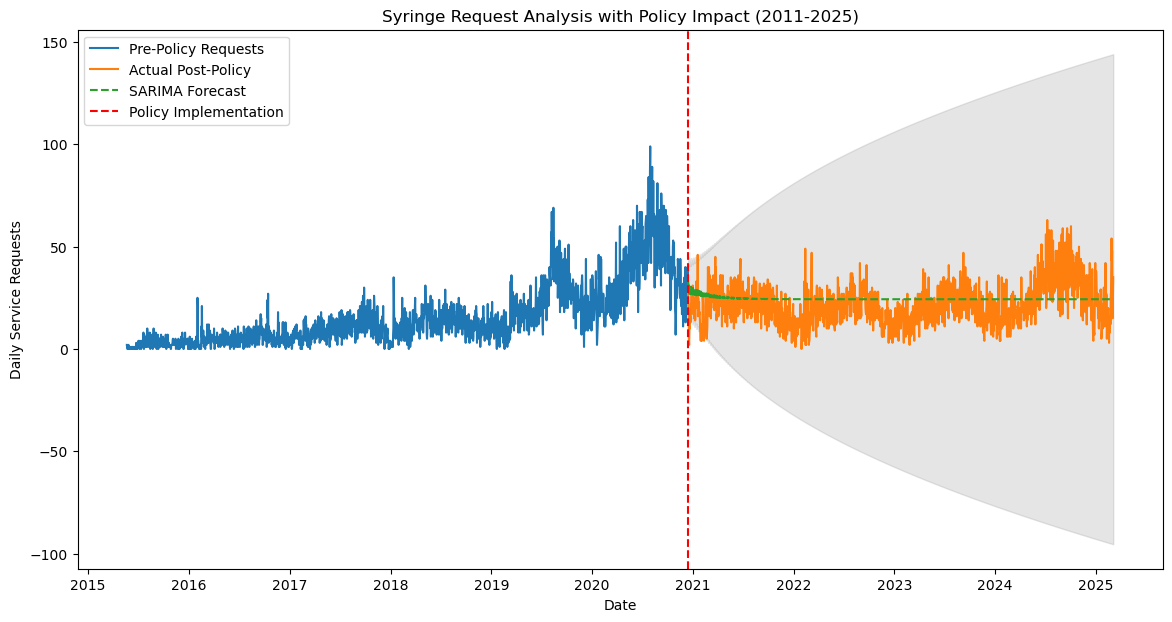

In [52]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Validate dataset structure
assert not df.empty, "Dataset is empty"
assert 'open_dt' in df.columns, "Missing 'open_dt' column"

# Preserve 'open_dt' column while setting it as the index for temporal analysis
df_indexed = df.set_index('open_dt').sort_index()

# Enhanced syringe request filtering (assuming dataset is already filtered)
syringe_requests = df_indexed.copy()

# Data validation
if syringe_requests.empty:
    raise ValueError("No syringe-related requests found")

# Policy timeframe configuration
policy_date = pd.to_datetime('2020-12-14')  # Date when Community Syringe Redemption Program (CSRP) was introduced in Boston
daily_counts = syringe_requests.resample('D').size().rename('requests')

# Create complete date range
full_range = pd.date_range(start=daily_counts.index.min(),
                           end=daily_counts.index.max(),
                           freq='D')
daily_counts = daily_counts.reindex(full_range)

# Create policy impact feature
daily_counts = daily_counts.to_frame()
daily_counts['post_policy'] = (daily_counts.index >= policy_date).astype(int)

# Temporal split based on policy date
train = daily_counts.loc[daily_counts.index < policy_date, 'requests']
exog_train = daily_counts.loc[daily_counts.index < policy_date, ['post_policy']]
test = daily_counts.loc[daily_counts.index >= policy_date, 'requests']
exog_test = daily_counts.loc[daily_counts.index >= policy_date, ['post_policy']]

# Auto-ARIMA model with policy impact analysis
model = auto_arima(
    train,
    exogenous=exog_train,
    seasonal=True,
    m=7,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

# Generate forecasts with policy impact
forecast, conf_int = model.predict(
    n_periods=len(test),
    exogenous=exog_test,
    return_conf_int=True
)

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Pre-Policy Requests')
plt.plot(test.index, test, label='Actual Post-Policy')
plt.plot(test.index, forecast, label='SARIMA Forecast', linestyle='--')
plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], 
                 color='gray', alpha=0.2)
plt.axvline(policy_date, color='r', linestyle='--', 
           label='Policy Implementation')
plt.title('Syringe Request Analysis with Policy Impact (2011-2025)')
plt.xlabel('Date')
plt.ylabel('Daily Service Requests')
plt.legend()
plt.show()

# Reset index to restore 'open_dt' as a column if needed
df_reset = df_indexed.reset_index()


In [53]:
print(model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 2034
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 7)   Log Likelihood               -6622.126
Date:                           Tue, 11 Mar 2025   AIC                          13258.253
Time:                                   14:30:08   BIC                          13297.574
Sample:                               05-21-2015   HQIC                         13272.679
                                    - 12-13-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5732      0.075      7.628      0.000       0.426       0.720
ma.L1         -1.2955      0.079    -16.346

In [54]:
# Policy impact quantification
pre_mean = train.mean()
post_mean = test.mean()
impact = (post_mean - pre_mean) / pre_mean * 100
print(f"Policy Impact: {impact:.2f}% change in daily requests")


Policy Impact: 39.52% change in daily requests


# SAVE THE DATA(df) FOR DASHBOARDING

In [68]:
#save file to device
csv_filepath = "D:\\6980-Capstone\\Individual Project\\datasets\\syringe_request_data_new.csv"
df.to_csv(csv_filepath, index=False)
print ("Data saved to syringe_request_data_new.csv successfully")

Data saved to syringe_request_data_new.csv successfully


# END